<a href="https://colab.research.google.com/github/ShoOoi/MxDseminar/blob/master/YoloTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Darknet Yoloの起動と訓練について
- このノートブックでは、YOLOアルゴリズムのサンプルプログラムの実行と訓練を行います。


## 1.   Yolo algorithm (Run the sample program)

### Step.1 Mount my google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Step.2 Download darknet programs

In [2]:
cd /content/drive/My\ Drive/Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
!git clone https://github.com/chimamedia/darknet_sample.git

Cloning into 'darknet_sample'...
remote: Enumerating objects: 1532, done.
remote: Counting objects: 100% (1532/1532), done.
remote: Compressing objects: 100% (1123/1123), done.
remote: Total 1532 (delta 398), reused 1522 (delta 388), pack-reused 0
Receiving objects: 100% (1532/1532), 9.79 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (398/398), done.
Checking out files: 100% (2351/2351), done.


### Step.3 Run a sample program

In [4]:
cd darknet_sample/

/content/drive/My Drive/Colab Notebooks/darknet_sample


#### Step.3.1 Create runing file

In [5]:
!mkdir build-release

mkdir: cannot create directory ‘build-release’: File exists


In [6]:
cd build-release

/content/drive/My Drive/Colab Notebooks/darknet_sample/build-release


In [7]:
!cmake ..

-- Autodetected CUDA architecture(s):  3.7
-- Building with CUDA flags: -gencode;arch=compute_37,code=sm_37
-- Your setup does not supports half precision (it requires CC >= 7.5)
--   ->  darknet is fine for now, but uselib_track has been disabled!
--   ->  Please rebuild OpenCV from sources with CUDA support to enable it
-- Found CUDNN: /usr/include (found version "7.6.5") 
-- CMAKE_CUDA_FLAGS: -gencode arch=compute_37,code=sm_37 --compiler-options " -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -Wno-deprecated-declarations -Wno-write-strings -DGPU -DCUDNN -DOPENCV -fPIC -fopenmp -Ofast " 
-- Configuring done
-- Generating done
-- Build files have been written to: /content/drive/My Drive/Colab Notebooks/darknet_sample/build-release


In [8]:
!make

Scanning dependencies of target darknet
[ -1%] Building C object CMakeFiles/darknet.dir/src/darknet.c.o
[ -1%] Building C object CMakeFiles/darknet.dir/src/activation_layer.c.o
[  0%] Building C object CMakeFiles/darknet.dir/src/activations.c.o
/content/drive/My Drive/Colab Notebooks/darknet_sample/src/activations.c: In function ‘activate’:
/content/drive/My Drive/Colab Notebooks/darknet_sample/src/activations.c:68:5: warning: enumeration value ‘SWISH’ not handled in switch [-Wswitch]
     switch(a){
     ^~~~~~
/content/drive/My Drive/Colab Notebooks/darknet_sample/src/activations.c: In function ‘gradient’:
/content/drive/My Drive/Colab Notebooks/darknet_sample/src/activations.c:138:5: warning: enumeration value ‘SWISH’ not handled in switch [-Wswitch]
     switch(a){
     ^~~~~~
[  0%] Building C object CMakeFiles/darknet.dir/src/art.c.o
[  1%] Building C object CMakeFiles/darknet.dir/src/avgpool_layer.c.o
[  2%] Building C object CMakeFiles/darknet.dir/src/batchnorm_layer.c.o
[  2%]

In [9]:
!make install

[ 47%] Built target darknet
[ 96%] Built target dark
[ 98%] Built target uselib
Install the project...
-- Install configuration: ""
-- Installing: /content/drive/My Drive/Colab Notebooks/darknet_sample/libdark.so
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet_sample/include/darknet/darknet.h
-- Up-to-date: /content/drive/My Drive/Colab Notebooks/darknet_sample/include/darknet/yolo_v2_class.hpp
-- Installing: /content/drive/My Drive/Colab Notebooks/darknet_sample/uselib
-- Set runtime path of "/content/drive/My Drive/Colab Notebooks/darknet_sample/uselib" to ""
-- Installing: /content/drive/My Drive/Colab Notebooks/darknet_sample/darknet
-- Old export file "/content/drive/My Drive/Colab Notebooks/darknet_sample/share/darknet/DarknetTargets.cmake" will be replaced.  Removing files [/content/drive/My Drive/Colab Notebooks/darknet_sample/share/darknet/DarknetTargets-noconfig.cmake].
-- Installing: /content/drive/My Drive/Colab Notebooks/darknet_sample/share/darknet/DarknetT

In [10]:
cd ..

/content/drive/My Drive/Colab Notebooks/darknet_sample


#### Step.3.2 Download the weight file(learned file)

In [11]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-12-13 16:24:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  21.6MB/s    in 13s     

2019-12-13 16:25:02 (18.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



#### Step.3.3 Run the sample yolo

In [14]:
!./darknet detector test ./cfg/coco.data ./cfg/yolov3.cfg ./yolov3.weights

   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF
  13 conv    128       1 x 1/ 1     52 x  52 x 256 ->   52 x  5

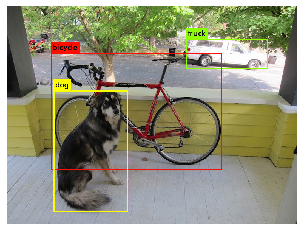

In [15]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)

# ２．オリジナルの画像を学習する

### Step.1 Train a weight file

データの作成を行う．
まずは、https://github.com/chimamedia/yolo_tools よりツールのプログラムをダウンロードする．

解凍すると以下のような構成
```
yolo_tools
｜－BBox-Label-Tool.py
｜－README.md
｜－base.cfg
｜－convert_v2.py
｜－convert_v3.py
｜－convert_voc_2.py
｜－create_darknet_data.py
｜－darknet.exe
｜－inflate_images.py
｜－inflate_images2.py
｜－make_labels.py
｜－pthreadGC2.dll
｜－pthreadVC2.dll
｜－yolo-voc.2.0.cfg
｜－yolov3.cfg
```

### １．新しいフォルダを作成する
例）yurucamp

作成したフォルダの中に「images」のフォルダと「classes.txt」を作成する。

「classess.txt」には認識したい名前を書いていく。 \\
例） \\
nadeshiko \\
rin

imagesフォルダには、classess.txtに書いた数だけフォルダを作成する \\
例） \\
001 \\
002

※画像はすべてJPEGファイル（.jpg）にする必要がある。

### ２．認識したいものを設定する
- コマンドプロンプトを起動する。

プログラムを実行
```
 python .\BBox-Label-Tool.py [フォルダの名前]

 例）
 python .\BBox-Label-Tool.py yurucamp
```

Image Dir: にフォルダの名前（001,002,...）を書いていき、認識したいものを囲っていく

### ３．訓練用の画像と設定ファイルを作成する
プログラムを実行
```
python .\inflate_images.py [フォルダの名前]
python .\convert_v3.py [フォルダの名前]

例）
python .\inflate_images.py yurucamp
python .\convert_v3.py yurucamp
```

### ４．データを圧縮してアップロードする

参考：
https://qiita.com/chimamedia/items/c261a858e1c7b8160af1


In [16]:
!unzip yurucamp.zip

Archive:  yurucamp.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of yurucamp.zip or
        yurucamp.zip.zip, and cannot find yurucamp.zip.ZIP, period.


#### 学習用の重みファイルをダウンロードする

In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

## オリジナルのデータで学習をする。

In [0]:
!./darknet detector train ./yurucamp/config/learning.data ./yurucamp/config/learning.cfg ./darknet53.conv.74 -dont_show

In [0]:
!./darknet detector test ./yurucamp/config/learning.data ./yurucamp/config/learning.cfg ./backup/learning_last.weights -i 0

In [0]:
import cv2
import matplotlib.pyplot as plt
import os.path

# 座標軸の削除処理
fig,ax = plt.subplots()
ax.tick_params(labelbottom="off",bottom="off")
ax.tick_params(labelleft="off",left="off")
ax.set_xticklabels([]) 
ax.axis('off')

file = './predictions.jpg'
if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  plt.imshow(show_img)